## Penjelasan tiap kolom data:

1. **app_id:** ID aplikasi atau nomor identifikasi unik untuk setiap aplikasi pinjaman.

2. **due_date:** Tanggal jatuh tempo atau batas waktu pembayaran pinjaman.

3. **paid_date:** Tanggal ketika pembayaran berdasarkan `paid_amount` telah diterima oleh pemberi pinjaman.

4. **due_amount:** Sisa jumlah pinjaman uang yang belum dibayar.

5. **paid_amount:** Jumlah uang yang dibayarkan oleh peminjam pada tanggal pembayaran atau `paid_date`.

6. **monthly_income:** Pendapatan bulanan dari peminjam.

7. **housing_type:** Tipe kepemilikan tempat tinggal oleh peminjam .

8. **num_of_dependent:** Jumlah orang tanggungan atau anggota keluarga peminjam yang bergantung pada pendapatannya.

9. **lama_bekerja:** Lama waktu (dalam tahun) peminjam telah bekerja di pekerjaan saat ini.

10. **otr:** atau "On The Road," yaitu harga total mobil termasuk semua biaya yang diperlukan untuk membuat mobil tersebut siap digunakan di jalan raya.

11. **status_pernikahan:** Status pernikahan peminjam.

12. **pekerjaan:** Jenis pekerjaan atau profesi peminjam.

13. **tenor:** Jangka waktu atau durasi pinjaman dalam bulan, menunjukkan berapa lama peminjam akan membayar pinjaman tersebut.

14. **dp:** "Down Payment" adalah jumlah uang muka yang telah dibayarkan oleh peminjam pada saat mengambil pinjaman.

In [2]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.util as util

C:\Users\Admin\AppData\Local\Temp\ipykernel_1180\1553364805.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
df = pd.read_csv('data/raw/data_scientist_exercise.csv')
display(df.head())

,app_id,due_date,paid_date,due_amount,paid_amount,monthly_income,housing_type,num_of_dependent,lama_bekerja,otr,status_pernikahan,pekerjaan,tenor,dp
0,1,2018-04-07,2018-04-06,Rp0.0,Rp12000000.0,Rp9295094.0,milik sendiri,3 orang,2 tahun,Rp800000000.0,Belum Nikah,Karyawan Swasta,60,Rp80000000.0
1,2,2018-02-07,2018-02-07,Rp0.0,Rp12200000.0,Rp9295094.0,milik sendiri,3 orang,2 tahun,Rp800000000.0,Belum Nikah,Karyawan Swasta,60,Rp68000000.0
2,3,2018-03-07,2018-03-06,Rp0.0,Rp12000000.0,Rp9295094.0,milik sendiri,3 orang,2 tahun,Rp800000000.0,Belum Nikah,Karyawan Swasta,60,Rp80000000.0
3,4,2018-05-07,2018-05-05,Rp0.0,Rp12000000.0,Rp9295094.0,milik sendiri,3 orang,2 tahun,Rp800000000.0,Belum Nikah,Karyawan Swasta,60,Rp80000000.0
4,5,2018-06-07,2018-06-06,Rp0.0,Rp12000000.0,Rp9295094.0,milik sendiri,3 orang,2 tahun,Rp800000000.0,Belum Nikah,Karyawan Swasta,60,Rp80000000.0


# Check data type

In [7]:
df.dtypes

app_id                int64
due_date             object
paid_date            object
due_amount           object
paid_amount          object
monthly_income       object
housing_type         object
num_of_dependent     object
lama_bekerja         object
otr                  object
status_pernikahan    object
pekerjaan            object
tenor                 int64
dp                   object
dtype: object

# Check missing data atau nans

In [8]:
df.isnull().sum()

app_id                  0
due_date                0
paid_date            1028
due_amount              0
paid_amount             0
monthly_income          0
housing_type            0
num_of_dependent        0
lama_bekerja            0
otr                     0
status_pernikahan       0
pekerjaan               0
tenor                   0
dp                      0
dtype: int64

Disini kita bisa lihat bahwa nilai data paid date banyak yang null.
- Selain itu kebanyakan tipe datanya adalah object.
- due_date dan paid_date haruslah bentuknya datetime
- due_amount dan paid_amount,  monthly_income, otr, dan dp  haruslah bentuknya integer. Disini otomatis terbaca str data object karena ada "Rp" di tiap rownya
- num_of_dependent dan lama_bekerja perlu kita ubah ke bentuk integer

# Handling Variabel "paid_date" dan "due_date"


In [9]:
# Mengubah kolom paid_date dan due_date ke tipe datetime
df['paid_date'] = pd.to_datetime(df['paid_date'] )
df['due_date'] = pd.to_datetime(df['due_date'] )

# Handling Variabel `due_amount`, `paid_amount`, `monthly_income`, `otr`, `dp`, `num_of_dependent` dan `lama_bekerja` ke bentuk int


In [10]:
#Mengubah kolom `due_amount`, `paid_amount`, `monthly_income`, `otr`, `dp`, `num_of_dependent` dan `lama_bekerja` ke bentuk int
df['num_of_dependent'] = df['num_of_dependent'].str.replace(' orang', '').str.replace('.','').astype('int64')
df['lama_bekerja'] = df['lama_bekerja'].str.replace(' tahun', '').str.replace('.','').astype('int64')
df['due_amount'] = df['due_amount'].str.replace('Rp', '').str.replace('.','').astype('int64')
df['paid_amount'] = df['paid_amount'].str.replace('Rp', '').str.replace('.','').astype('int64')
df['monthly_income'] = df['monthly_income'].str.replace('Rp', '').str.replace('.','').astype('int64')
df['otr'] = df['otr'].str.replace('Rp', '').str.replace('.','').astype('int64')
df['dp'] = df['dp'].str.replace('Rp', '').str.replace('.','').astype('int64')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9218 entries, 0 to 9217
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   app_id             9218 non-null   int64         
 1   due_date           9218 non-null   datetime64[ns]
 2   paid_date          8190 non-null   datetime64[ns]
 3   due_amount         9218 non-null   int64         
 4   paid_amount        9218 non-null   int64         
 5   monthly_income     9218 non-null   int64         
 6   housing_type       9218 non-null   object        
 7   num_of_dependent   9218 non-null   int64         
 8   lama_bekerja       9218 non-null   int64         
 9   otr                9218 non-null   int64         
 10  status_pernikahan  9218 non-null   object        
 11  pekerjaan          9218 non-null   object        
 12  tenor              9218 non-null   int64         
 13  dp                 9218 non-null   int64         
dtypes: datet

# Handling data labelling

# Data labelling

Disini karena data labelnya belum kita akan coba buat labelnya. Kita akan menentukan app_i yang npl atau engga berdasarkan due date

Disini kita kemudian membuat kolom baru yaitu `NPL` 

- Kolom `NPL` digunakan untuk menentukan apakah pinjaman lunas atau belum lunas dibayar lebih dari atau sama dengan 90 hari dari  `due_date`.



In [11]:
#Pertama kita coba buat kolom selisih hari yaitu `due_date - paid_date `
df['selisih_hari'] = (df['due_date'] - df['paid_date']).dt.days


# Membuat kolom baru dengan nilai 1 jika NPl dan 0 jika tidak
df['NPL'] =  'Tidak'

df.loc[df['due_amount'] > 0, 'NPL'] = 'Ya'
df.loc[(df['due_amount'] == 0) & (df['selisih_hari'] <= -90), 'NPL'] = 'Ya'

# Check absence of predictors
Disini tidak semua kolom digunakan sebagai prediktor karena kita hanya akan mendapat data identitas dan berapa harga awal yang mampu dibayar oleh nasabah

Sehingga kita perlu drop column app_id, due_date, paid_date, due_amount, paid_amount.

In [12]:
# Remove column ['app_id','due_date','paid_date','due_amount','paid_amount','selisih_hari']
df_predictors = df.copy().drop(columns=['app_id','due_date','paid_date','due_amount','paid_amount','selisih_hari'],axis=1)
df_predictors

,monthly_income,housing_type,num_of_dependent,lama_bekerja,otr,status_pernikahan,pekerjaan,tenor,dp,NPL
0,92950940,milik sendiri,3,2,8000000000,Belum Nikah,Karyawan Swasta,60,800000000,Tidak
1,92950940,milik sendiri,3,2,8000000000,Belum Nikah,Karyawan Swasta,60,680000000,Tidak
2,92950940,milik sendiri,3,2,8000000000,Belum Nikah,Karyawan Swasta,60,800000000,Tidak
3,92950940,milik sendiri,3,2,8000000000,Belum Nikah,Karyawan Swasta,60,800000000,Tidak
4,92950940,milik sendiri,3,2,8000000000,Belum Nikah,Karyawan Swasta,60,800000000,Tidak
...,...,...,...,...,...,...,...,...,...,...
9213,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya
9214,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya
9215,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya
9216,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya


In [13]:
cat_column = [col for col in df_predictors.columns if df_predictors[col].dtype=='O']
num_column = [col for col in df_predictors.columns if df_predictors[col].dtype!='O']
num_column

['monthly_income', 'num_of_dependent', 'lama_bekerja', 'otr', 'tenor', 'dp']

# Check Skewness of data

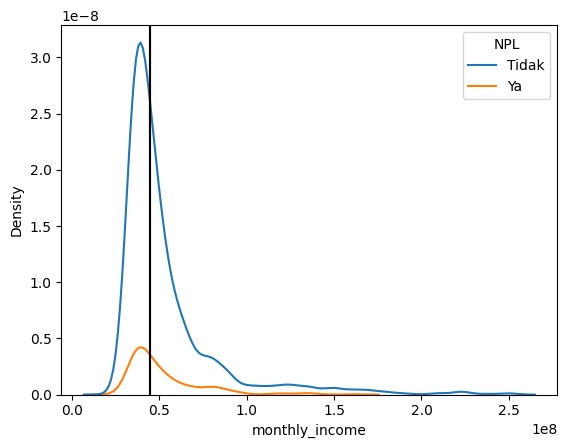

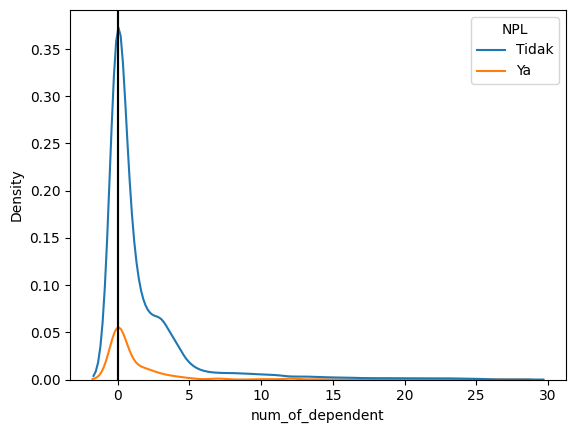

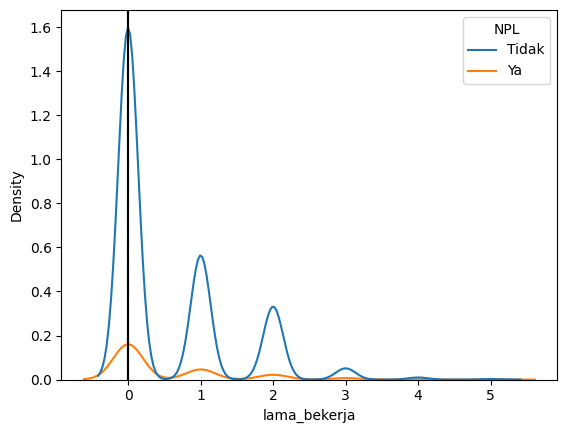

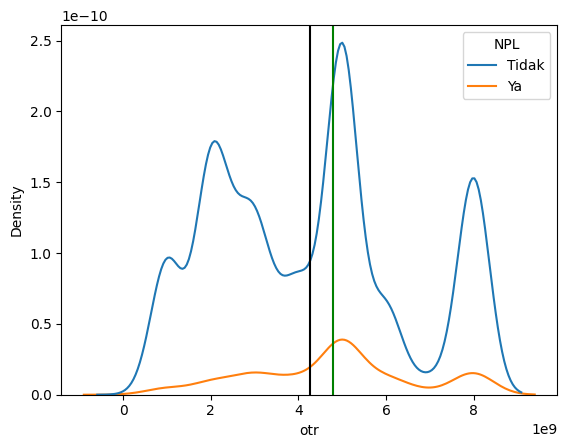

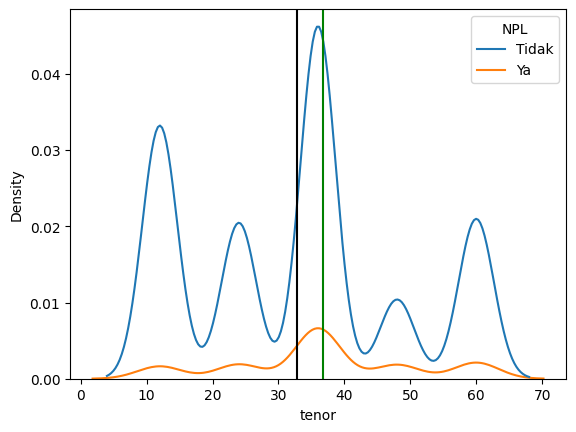

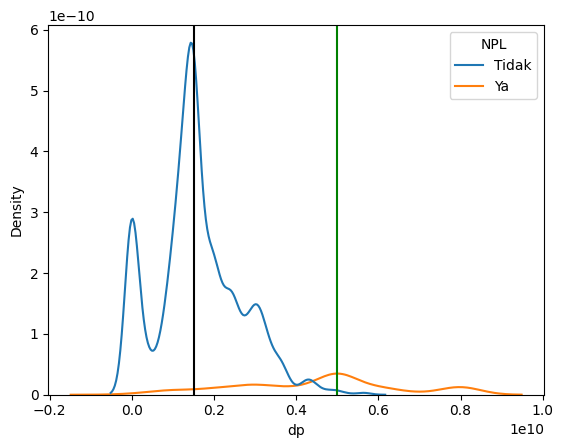

In [14]:
# plot untuk melihat distribusi pm10 jika dibedakan berdasarkan categori
for col in num_column:
    data_npl = df_predictors[df_predictors['NPL']=='Ya']
    data_npl_no = df_predictors[df_predictors['NPL']=='Tidak']
    sns.kdeplot(data = df_predictors, x = col, hue = "NPL")
    if (df_predictors[col].skew() < -1) or (df_predictors[col].skew() > 1):
        plt.axvline(data_npl[col].median(), 0, 1, color = "g")
        plt.axvline(data_npl_no[col].median(), 0, 1, color = "k")
    else:
        plt.axvline(data_npl[col].mean(), 0, 1, color = "g")
        plt.axvline(data_npl_no[col].mean(), 0, 1, color = "k")
    plt.show()

In [15]:
df_predictors[num_column].skew()

monthly_income      3.065272
num_of_dependent    3.749478
lama_bekerja        1.490977
otr                 0.267874
tenor               0.215623
dp                  1.467493
dtype: float64

Disini ditemukan ada data yang skewness yang lebih dari 1 atau kurang dari -1. Disini dp di atas 1 karena nilai distribusi dp untuk yang NPL dan tidak NPL berbeda, sedangkan pada data monthly_income num_of_dependent dan lama bekerja nilai skewness nya kurang dari -1 karena distribusinya yang skew ke kiri. 



# Handling skewed data with log Transformation
Kita bisa menerapkan transformasi logaritmik pada data yg skew kekiri ini sehingga datanya tidak akan terbuang banyak saat menghapus outlier. Kita tidak menerapkan transformasi pada kolom dp karena kolom tersebut memiliki distribsi yg berbeda jauh antara yg NPL dan tidak

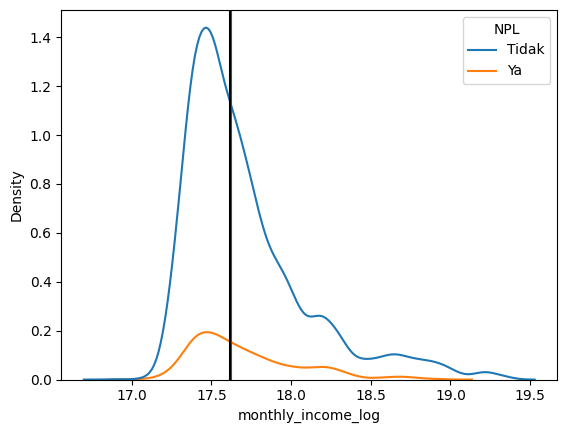

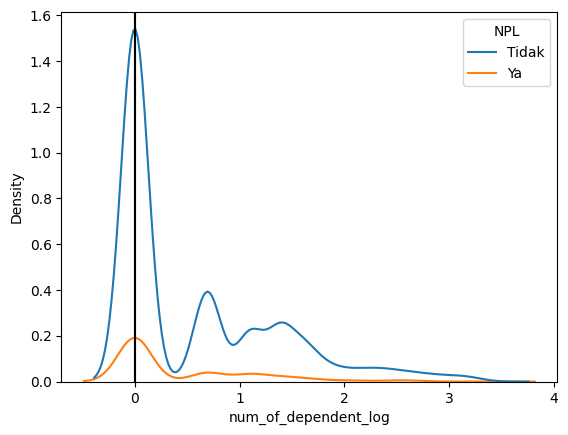

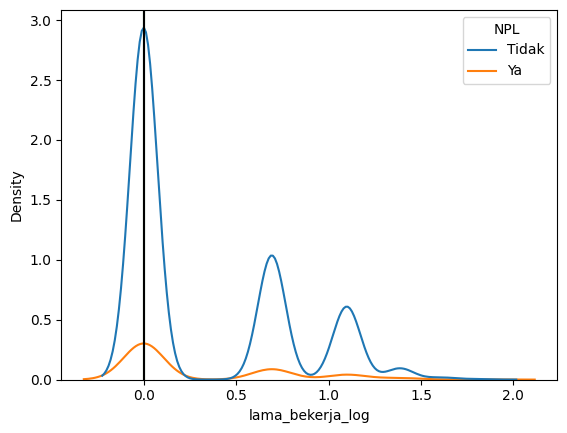

In [18]:
import numpy as np
skew_columns = [col for col in num_column if ((df[col].skew()<-1) or (df[col].skew()>1)) and col!='dp']
skew_columns.append('NPL')
df_skew = df_predictors.copy()[skew_columns]
num_column_before_log = []
for col in skew_columns:
    if col!='NPL':
        col_log = f'{col}_log'
        df_predictors[col_log] = df_predictors[col].apply(lambda x: np.log(x+1))
        df_predictors_npl = df_predictors[df_predictors['NPL']=='Ya']
        df_predictors_npl_no = df_predictors[df_predictors['NPL']=='Tidak']
        num_column_before_log.append(col)

        sns.kdeplot(data = df_predictors, x = col_log, hue = "NPL")
        plt.axvline(df_predictors_npl[col_log].median(), 0, 1, color = "g")
        plt.axvline(df_predictors_npl_no[col_log].median(), 0, 1, color = "k")
        plt.show()
    else :
        continue

# Check Outlier

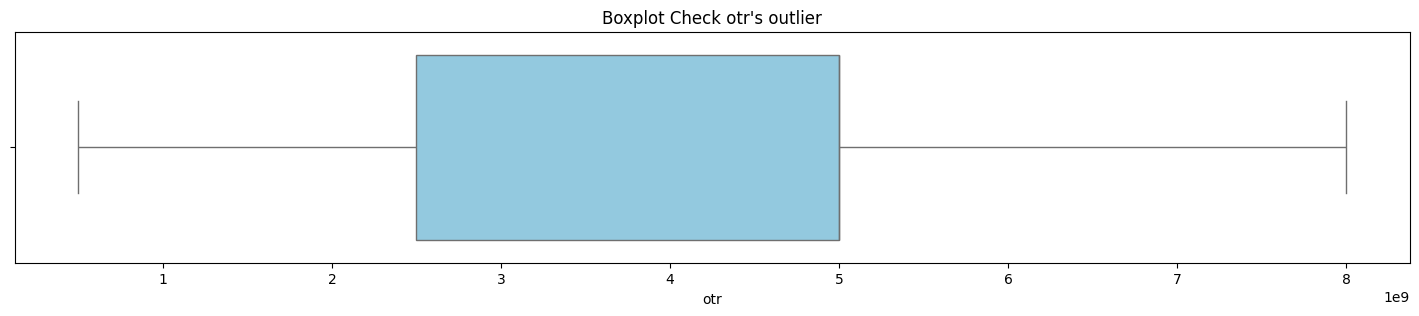

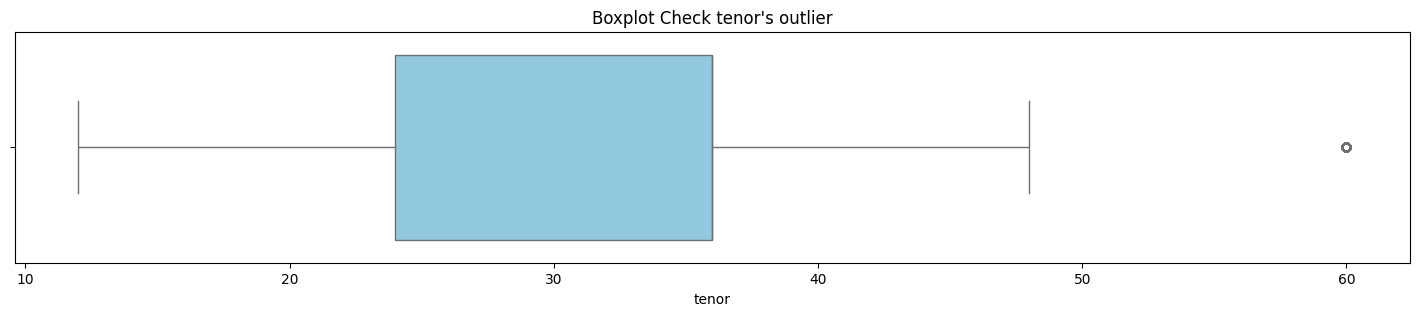

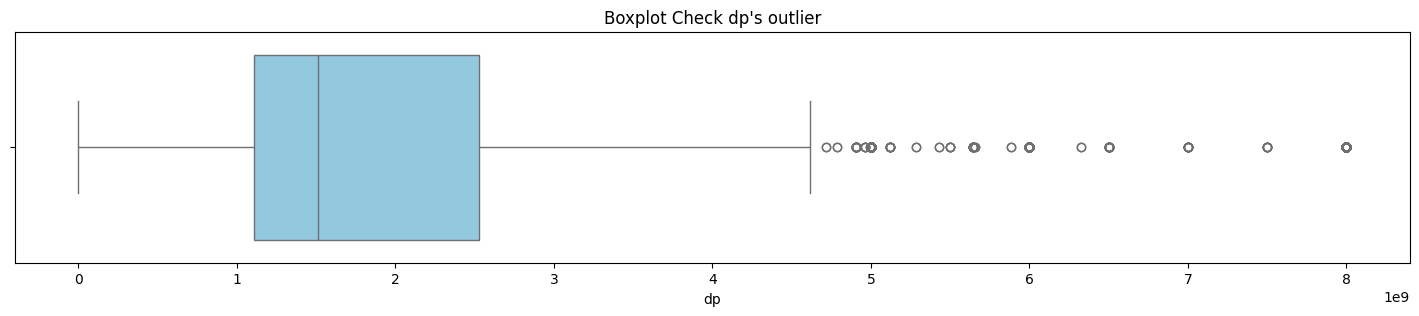

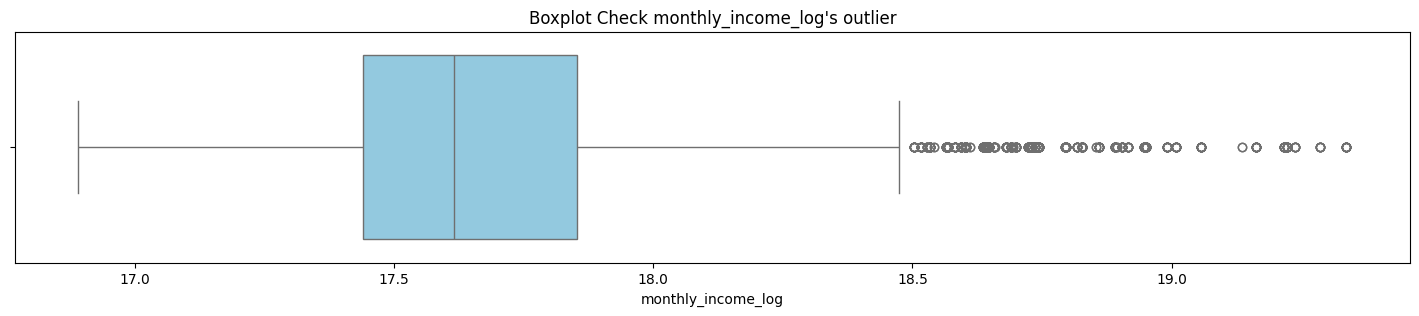

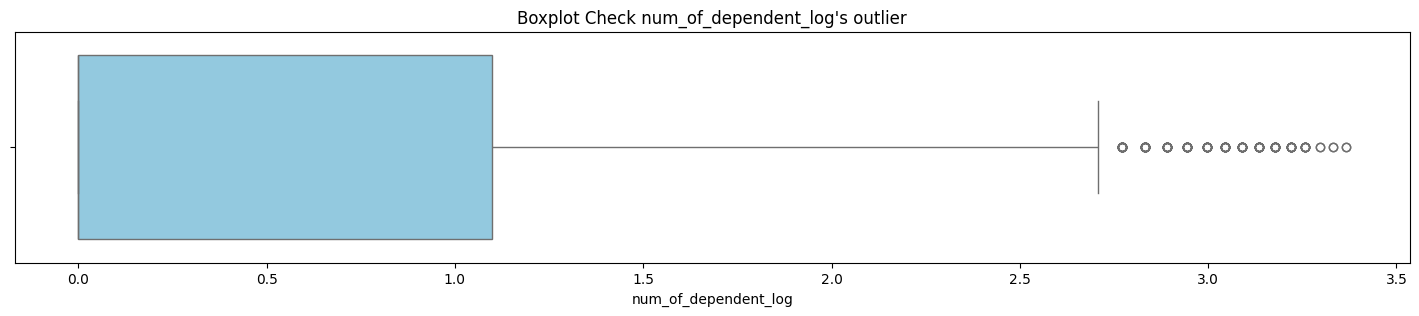

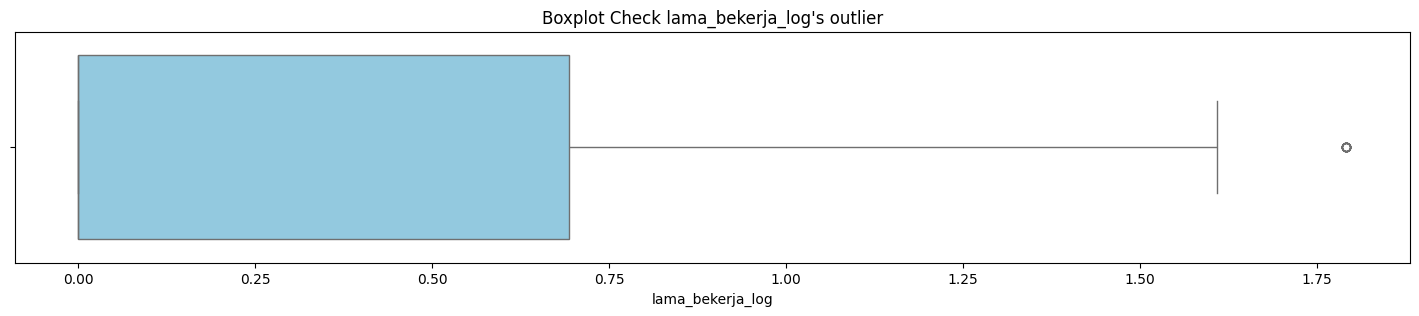

In [19]:
def box_plot(df,column):
    plt.figure(figsize=(18, 3))
    sns.boxplot(x=column, data=df, color='skyblue')
    plt.title(f"Boxplot Check {column}'s outlier")
    plt.xlabel(f'{column}')
    plt.show()

not_used = ['monthly_income','num_of_dependent','lama_bekerja']
for col in df_predictors.columns :
    if df_predictors[col].dtype!='O' and col not in not_used:
        box_plot(df_predictors,col)

# Handling Outlier

In [20]:
import pandas as pd

def remove_outliers(df, col):
    """
    Menghapus outlier dari DataFrame berdasarkan metode IQR.
    
    Parameters:
        df (DataFrame): DataFrame yang akan dihapus outlier-nya.
    
    Returns:
        DataFrame: DataFrame baru yang telah dihapus outlier-nya.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outlier = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_no_outlier


list_df = []
for col in df_predictors.columns:
    if df_predictors[col].dtype != 'O' and col != 'dp' and  col not in not_used:
        outlier_removed = remove_outliers(df_predictors, col)
        list_df.append(outlier_removed)

# Ambil indeks dari DataFrame pertama dalam list_df
common_index = list_df[0].index

# Iterasi melalui DataFrame lainnya dalam list_df untuk mendapatkan indeks yang bersamaan
for df in list_df[1:]:
    common_index = common_index.intersection(df.index)

final_df = df_predictors.loc[common_index]

In [21]:
final_df

,monthly_income,housing_type,num_of_dependent,lama_bekerja,otr,status_pernikahan,pekerjaan,tenor,dp,NPL,monthly_income_log,num_of_dependent_log,lama_bekerja_log
10,86808210,milik orang tua,3,1,1000000000,Belum Nikah,Wiraswasta,12,0,Tidak,18.279212,1.386294,0.693147
11,73000000,milik orang tua,2,0,1000000000,Belum Nikah,Profesional,12,0,Tidak,18.105970,1.098612,0.000000
12,45000000,milik sendiri,0,0,1000000000,Belum Nikah,Profesional,12,0,Tidak,17.622173,0.000000,0.000000
13,78400000,milik sendiri,1,1,6000000000,Nikah,Profesional,48,6000000000,Ya,18.177334,0.693147,0.693147
14,78400000,milik sendiri,1,1,6000000000,Nikah,Profesional,48,6000000000,Ya,18.177334,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000
9214,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000
9215,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000
9216,42500000,milik sendiri,3,0,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000


# Handling features that is not used

In [51]:
final_df = df_predictors.copy().drop(columns=not_used, axis=1)
final_df

,housing_type,otr,status_pernikahan,pekerjaan,tenor,dp,NPL,monthly_income_log,num_of_dependent_log,lama_bekerja_log
10,milik orang tua,1000000000,Belum Nikah,Wiraswasta,12,0,Tidak,18.279212,1.386294,0.693147
11,milik orang tua,1000000000,Belum Nikah,Profesional,12,0,Tidak,18.105970,1.098612,0.000000
12,milik sendiri,1000000000,Belum Nikah,Profesional,12,0,Tidak,17.622173,0.000000,0.000000
13,milik sendiri,6000000000,Nikah,Profesional,48,6000000000,Ya,18.177334,0.693147,0.693147
14,milik sendiri,6000000000,Nikah,Profesional,48,6000000000,Ya,18.177334,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...
9213,milik sendiri,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000
9214,milik sendiri,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000
9215,milik sendiri,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000
9216,milik sendiri,2000000000,Nikah,Wiraswasta,12,2000000000,Ya,17.565015,1.386294,0.000000


# Check data range again

In [25]:
num_column_final  = [col for col in final_df.columns if final_df[col].dtypes !='O']
cat_column_final  = [col for col in final_df.columns if final_df[col].dtypes =='O' and col!='NPL']

In [26]:
# Make function for checking data range
def check_data_num_range(data):
    max = data.max()
    min = data.min() 

    print(f"column = {data.name}")
    print(f"range of data : {min} - {max}")
    print(f"selisih : {max-min}")
    print()


def check_unique_cat(data):
    return list(data.unique())

print('Range of Data : \n')

for col in num_column_final:
    check_data_num_range(final_df[col])


for col in cat_column_final:
    unique = check_unique_cat(final_df[col])
    print(f"Unique data in columns {col} is {unique}")

Range of Data : 

column = monthly_income
range of data : 21664620 - 105000000
selisih : 83335380

column = num_of_dependent
range of data : 0 - 14
selisih : 14

column = lama_bekerja
range of data : 0 - 4
selisih : 4

column = otr
range of data : 500000000 - 7000000000
selisih : 6500000000

column = tenor
range of data : 12 - 48
selisih : 36

column = dp
range of data : 0 - 7000000000
selisih : 7000000000

column = monthly_income_log
range of data : 16.891191119349774 - 18.46947091764561
selisih : 1.578279798295835

column = num_of_dependent_log
range of data : 0.0 - 2.70805020110221
selisih : 2.70805020110221

column = lama_bekerja_log
range of data : 0.0 - 1.6094379124341003
selisih : 1.6094379124341003

Unique data in columns housing_type is ['milik orang tua', 'milik sendiri', 'kos', 'milik pasangan', 'kontrak']
Unique data in columns status_pernikahan is ['Belum Nikah', 'Nikah']
Unique data in columns pekerjaan is ['Wiraswasta', 'Profesional', 'Karyawan Swasta', 'PNS', 'Buruh', '

# Check imbalance data

Disini kelihatan bahwa data yang NPL jauh lebih sedikit dari yang tidak

NPL
Tidak    6378
Ya        914
Name: count, dtype: int64

<Axes: xlabel='NPL', ylabel='Count'>

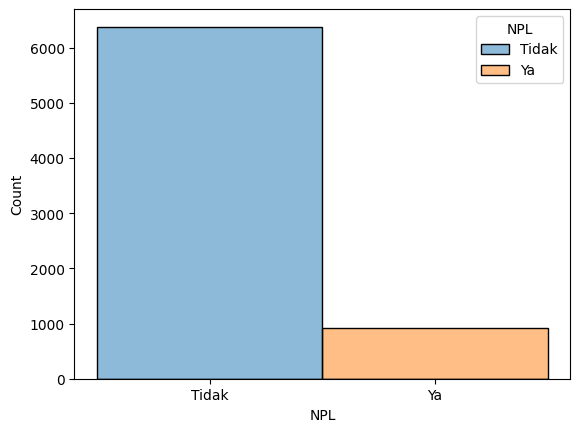

In [ ]:
display(final_df.NPL.value_counts())
sns.histplot(data = final_df, x = "NPL", hue = "NPL")



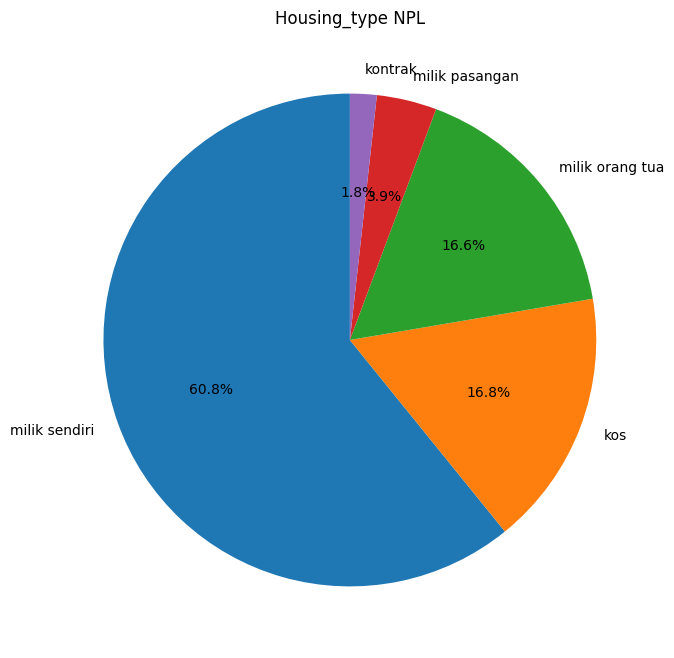

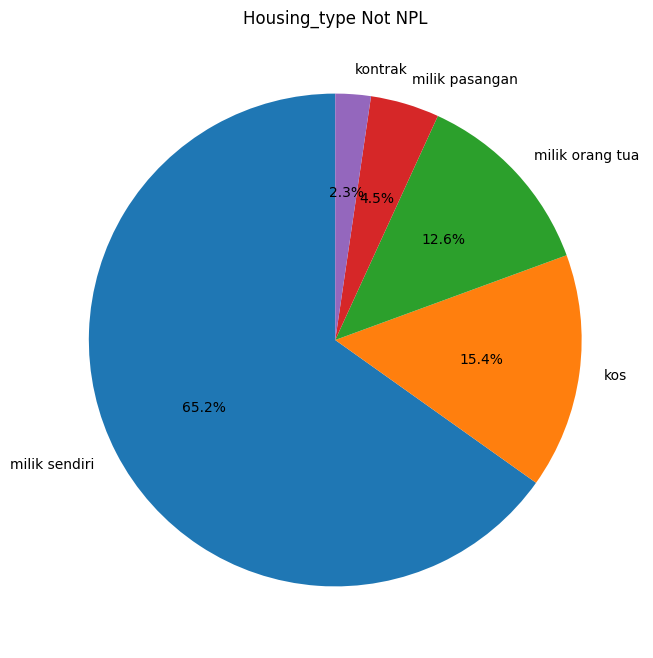

In [30]:
# Fungsi untuk membuat pie chart
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{title}")
    plt.show()

# Menghitung jumlah masing-masing kategori untuk kolom-kolom tertentu
housing_type_counts_npl = final_df[final_df['NPL']=='Ya']['housing_type'].value_counts()
housing_type_counts_npl_no = final_df[final_df['NPL']=='Tidak']['housing_type'].value_counts()


plot_pie_chart(housing_type_counts_npl,'Housing_type NPL')
plot_pie_chart(housing_type_counts_npl_no,'Housing_type Not NPL')



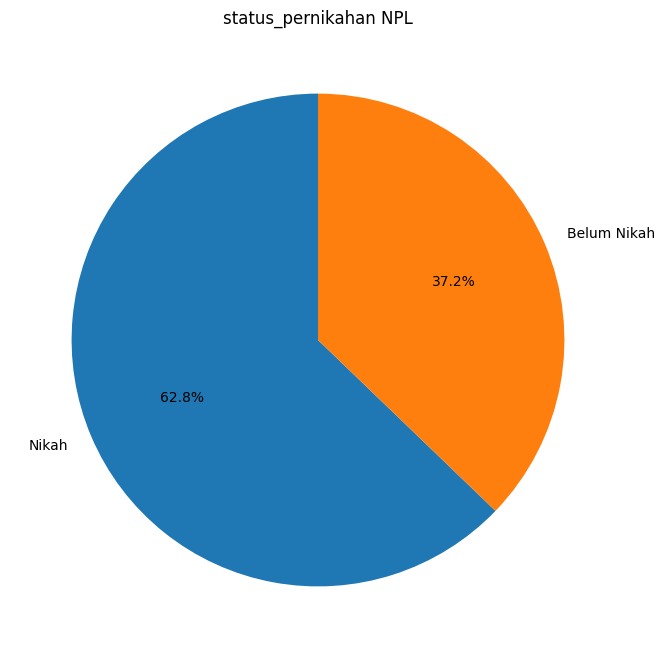

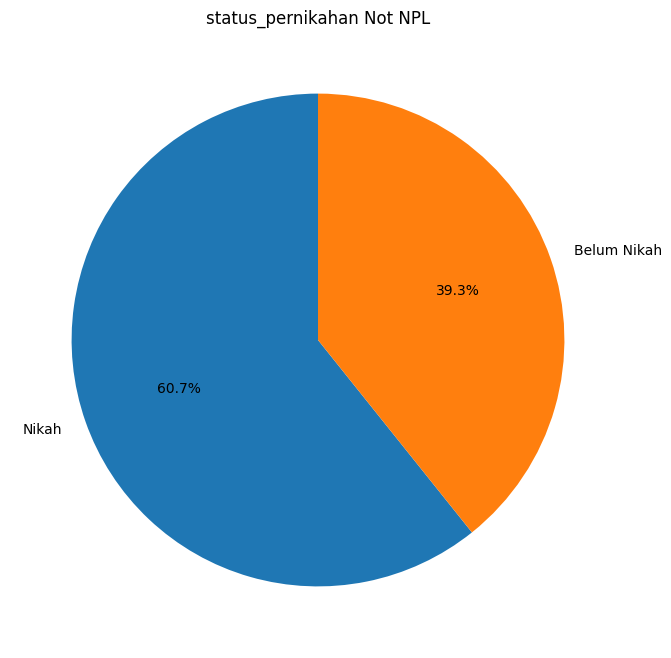

In [31]:
status_pernikahan_counts_npl = final_df[final_df['NPL']=='Ya']['status_pernikahan'].value_counts()
status_pernikahan_counts_npl_no  = final_df[final_df['NPL']=='Tidak']['status_pernikahan'].value_counts()

plot_pie_chart(status_pernikahan_counts_npl,'status_pernikahan NPL')
plot_pie_chart(status_pernikahan_counts_npl_no,'status_pernikahan Not NPL')




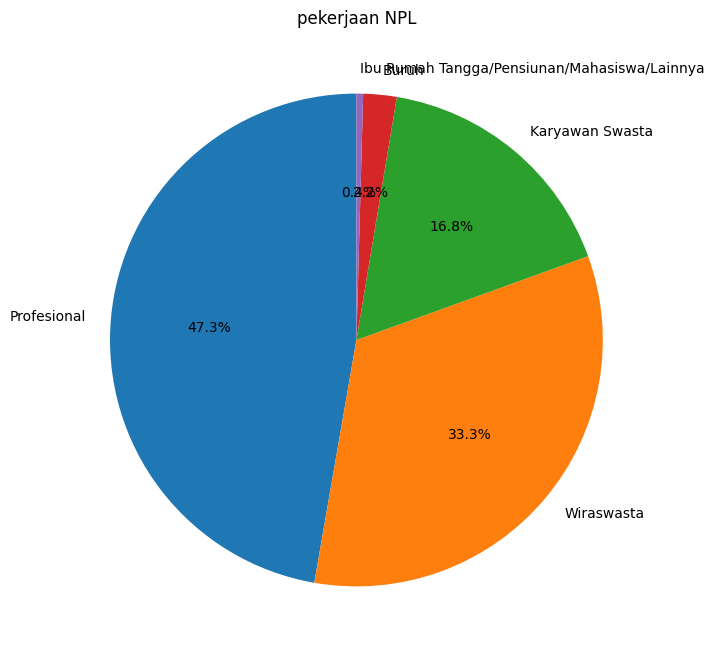

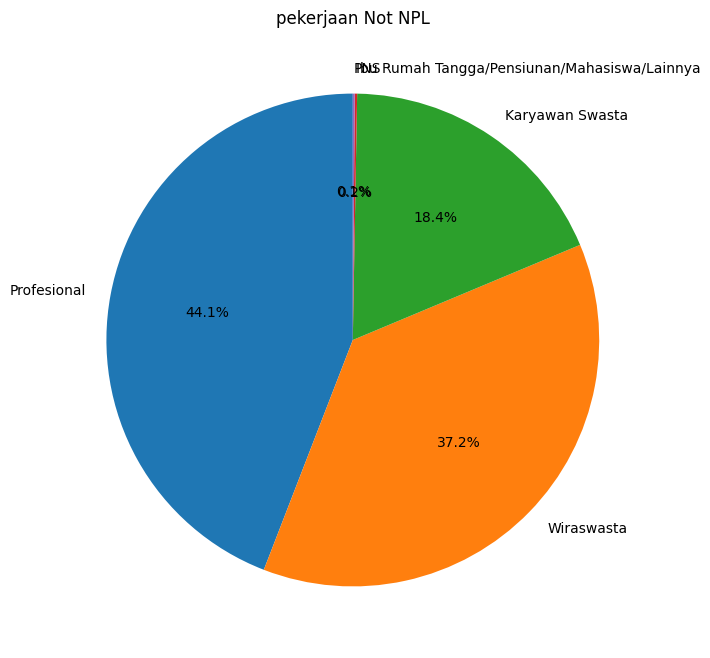

In [32]:

pekerjaan_counts_npl = final_df[final_df['NPL']=='Ya']['pekerjaan'].value_counts()
pekerjaan_counts_npl_no  = final_df[final_df['NPL']=='Tidak']['pekerjaan'].value_counts()

plot_pie_chart(pekerjaan_counts_npl,'pekerjaan NPL')
plot_pie_chart(pekerjaan_counts_npl_no,'pekerjaan Not NPL')
